# Creating a classification model, That suggest you what plant to plant under a certain climatic conditions

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
#importing dataset
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
#Renaming columns
df.columns = ['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'Relative Humidity(%)', 'ph', 'rainfall(mm)', 'label']

In [5]:
df.head()

,Nitrogen,Phosphorous,Potassium,temperature,Relative Humidity(%),ph,rainfall(mm),label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


##### Preprocessing

In [6]:
#checking the shape of the dataset
df.shape

(2200, 8)

In [7]:
#checking the details of  the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nitrogen              2200 non-null   int64  
 1   Phosphorous           2200 non-null   int64  
 2   Potassium             2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   Relative Humidity(%)  2200 non-null   float64
 5   ph                    2200 non-null   float64
 6   rainfall(mm)          2200 non-null   float64
 7   label                 2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
#checking statistical distribution of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nitrogen,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
Phosphorous,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
Potassium,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
Relative Humidity(%),2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall(mm),2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [9]:
#loooking for any null values
df.isnull().sum()

Nitrogen                0
Phosphorous             0
Potassium               0
temperature             0
Relative Humidity(%)    0
ph                      0
rainfall(mm)            0
label                   0
dtype: int64

In [10]:
#is there any duplicate
df.duplicated().sum()

0

In [11]:
#Data is clean

##### Data visualization

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

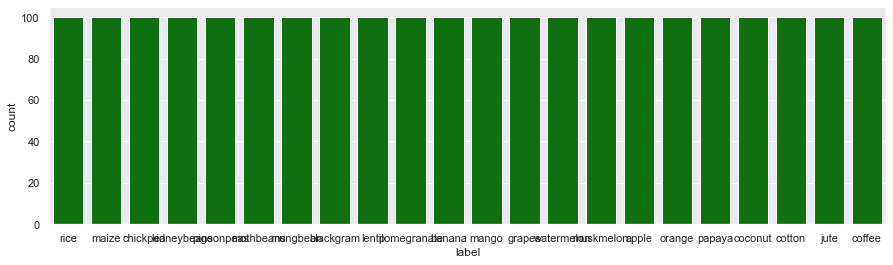

In [13]:
#Checking the distribution of our labels
plt.figure(figsize = (15,4))
sns.set_theme(style="darkgrid")
sns.countplot(x="label", data=df,color = "green");

In [14]:
#The labels are equally distributed

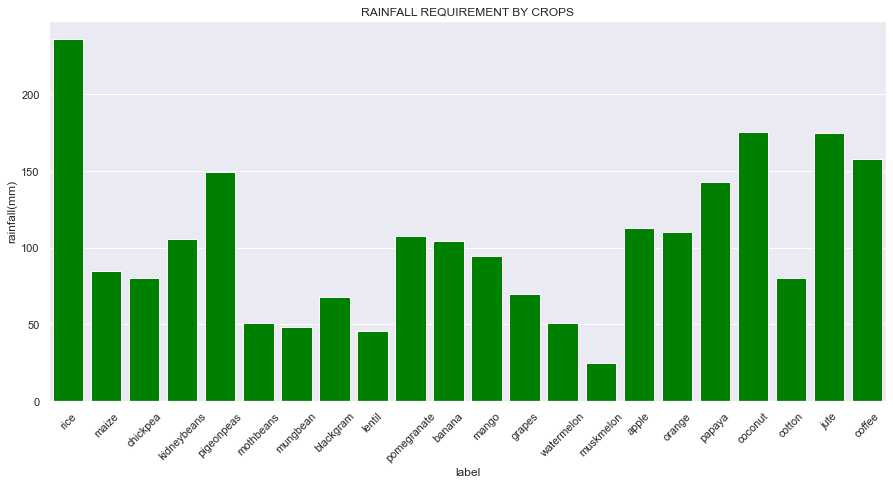

In [15]:
plt.figure(figsize = (15,7))
sns.barplot(x="label", y = "rainfall(mm)" , data = df,palette=None,saturation=100,color = "green",
            ci = 0).set_title("RAINFALL REQUIREMENT BY CROPS");
plt.xticks(rotation = 45);

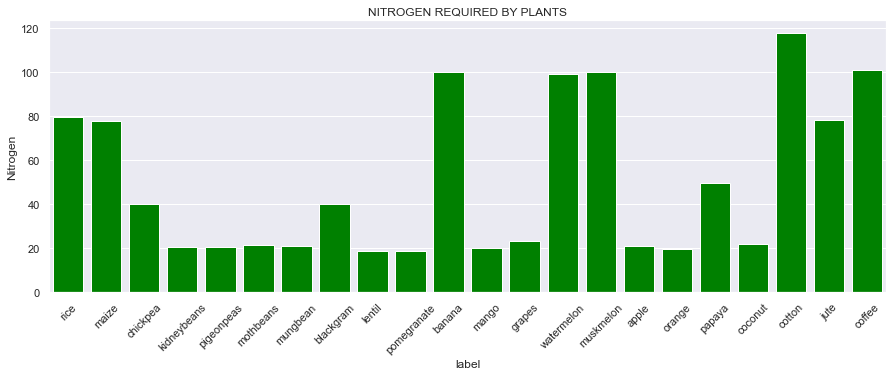

In [16]:
plt.figure(figsize = (15,5))
sns.barplot(x="label", y = "Nitrogen" , data = df,palette=None,saturation=100,
            color = "green",
            ci = 0).set_title("NITROGEN REQUIRED BY PLANTS");
plt.xticks(rotation = 45);


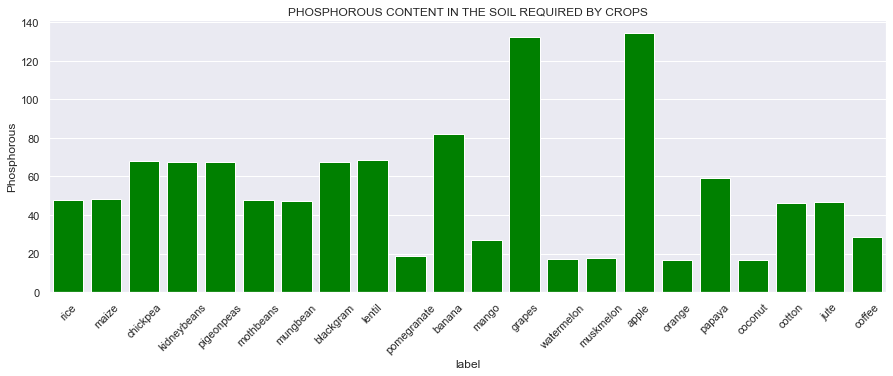

In [17]:
plt.figure(figsize = (15,5))
sns.barplot(x="label", y = "Phosphorous" , data = df,palette=None,saturation=100,
            color = "green",
            ci = 0).set_title("PHOSPHOROUS CONTENT IN THE SOIL REQUIRED BY CROPS");
plt.xticks(rotation = 45);

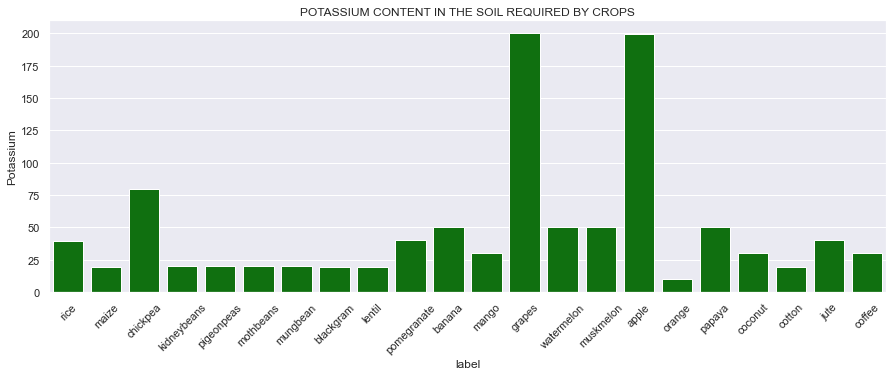

In [18]:
plt.figure(figsize = (15,5))
sns.barplot(x="label", y = "Potassium" , data = df,
            color = "green",
            ci = 0).set_title("POTASSIUM CONTENT IN THE SOIL REQUIRED BY CROPS");
plt.xticks(rotation = 45);

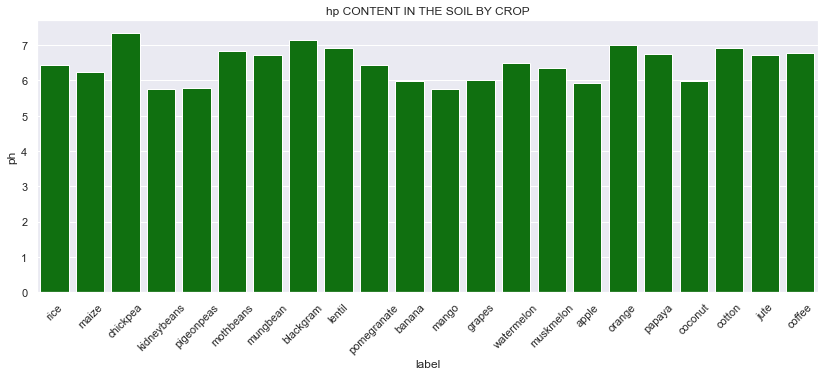

In [19]:
plt.figure(figsize = (14,5))
sns.barplot(x="label", y = "ph" , data = df,
            color = "green",
            ci = 0).set_title("hp CONTENT IN THE SOIL BY CROP");
plt.xticks(rotation = 45);

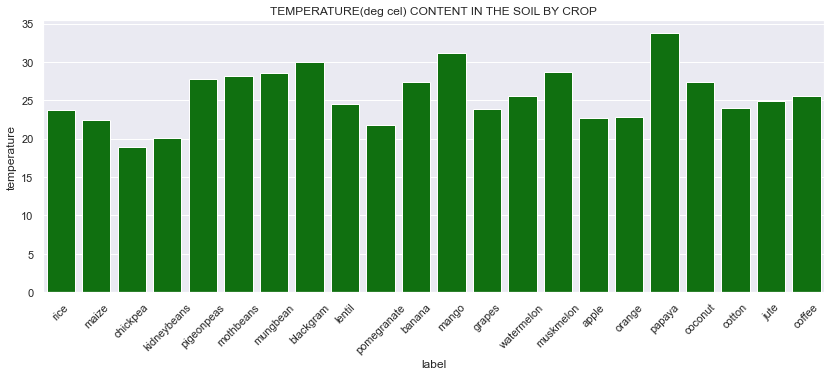

In [20]:
plt.figure(figsize = (14,5))
sns.barplot(x="label", y = "temperature" , data = df,
            color = "green",
            ci = 0).set_title("TEMPERATURE(deg cel) CONTENT IN THE SOIL BY CROP");
plt.xticks(rotation = 45);

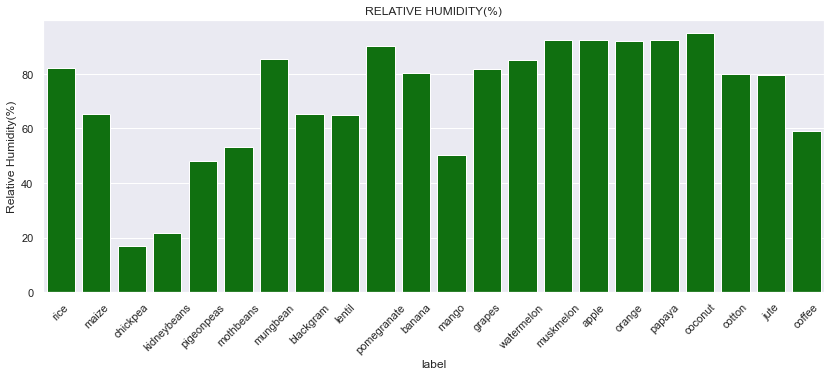

In [21]:
plt.figure(figsize = (14,5))
sns.barplot(x="label", y = "Relative Humidity(%)" , data = df,
            color = "green",
            ci = 0).set_title("RELATIVE HUMIDITY(%)");
plt.xticks(rotation = 45);

In [22]:
#Encording lables to check correlation
le = LabelEncoder()
df["encod_label"] = le.fit_transform(df["label"])

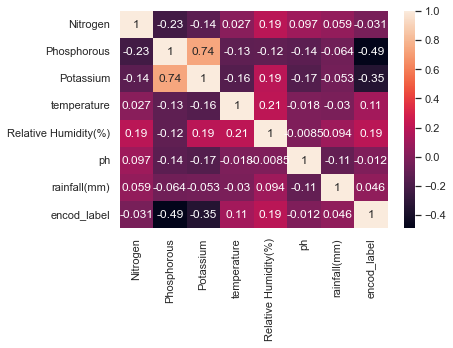

In [23]:
#how are this features correlated
sns.heatmap(df.drop(columns = ["label"]).corr(), annot = True, );

In [24]:
df = df.drop(columns = ["encod_label"])

##### Modelling

In [25]:
#feature selection
X = df.drop(columns =["label"])
y = df["label"]

In [26]:
#Spliting the data in traing and testing size. in a 20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=0)

In [27]:
X_test.head(3)

,Nitrogen,Phosphorous,Potassium,temperature,Relative Humidity(%),ph,rainfall(mm)
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111


In [28]:
y_train.head()

1878        coconut
717       blackgram
385     kidneybeans
2098           jute
1991         cotton
Name: label, dtype: object

In [29]:
#Scaling the X features
ss = StandardScaler()
X_train_transformed = ss.fit_transform(X_train)
X_test_transformed = ss.transform(X_test)

In [30]:
#Using naive bayes (Multinomial)
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train, y_train)
pred = mn.predict(X_test)

In [31]:
accuracy_score(pred,y_test)

0.9

In [32]:
pd.DataFrame({"Real":y_test,
          "Actual":pred}).head()

,Real,Actual
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram


In [33]:
#Trying it using naive bayes Gaussian on scaled data
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(X_train_transformed, y_train)
pred1 = gn.predict(X_test_transformed)
accuracy_score(pred1,y_test)

1.0

In [34]:
pd.DataFrame({"Real":y_test,
          "Actual":pred1}).head()

,Real,Actual
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram


In [35]:
#trying it with decisiontree
from sklearn.tree import DecisionTreeClassifier
tr =DecisionTreeClassifier()
tr.fit(X_train,y_train)
pred2 = tr.predict(X_test)

In [36]:
accuracy_score(pred2,y_test)

1.0

In [37]:
pd.DataFrame({"Real":y_test,
          "Actual":pred2}).head()

,Real,Actual
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram


In [41]:
#Exporting our model
pickle.dump(tr, open("model.pkl","wb"))

In [39]:
loded_model = pickle.load(open("model.pkl","rb"))

In [40]:
loded_model.score(X_test,y_test)

1.0